# Brain Tumor Prediction

In [33]:
#Import the necessary libraries first

import tensorflow as tf
import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras import backend as K
import shutil
import glob
import re

# Loading and Preprocessing the data

In [2]:
data = 'brain_tumor_dataset'
No_brain_tumor = 'no'
Yes_brain_tumor = 'yes'

In [3]:
dirlist=[No_brain_tumor, Yes_brain_tumor]
classes=['No', 'Yes']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):


    filelist=os.listdir(i)
# os.listdir --> returns a list containing the names of the entries in the directory given by path.
    for f in filelist:
        filepath=os.path.join (i,f)
# os.path.join('brain_tumor_dataset/no/','1 no.jpeg;)
# brain_tumor_dataset/no/1 no.jpeg
        filepaths.append(filepath)
# store the path into empty list called filepaths
        labels.append(j)

In [4]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)

In [5]:
df['labels']=pd.get_dummies(df['labels'])

In [6]:
df.head()

,filepaths,labels
0,no\1 no.jpeg,1
1,no\10 no.jpg,1
2,no\11 no.jpg,1
3,no\12 no.jpg,1
4,no\13 no.jpg,1


# Data Visualization

1 no.jpeg
******************************
class = 1


<Figure size 288x288 with 0 Axes>

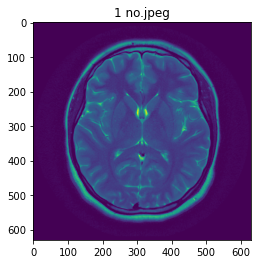

10 no.jpg
******************************
class = 1


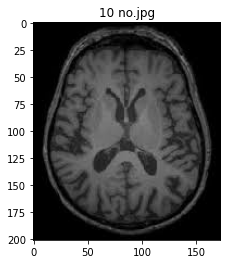

In [7]:
# Images belong to class 1 (brain tumor = no)

plt.figure(figsize=(4,4))
for i in range(0,2):
    fig, ax = plt.subplots(figsize=(4,4))
    img = mpimg.imread(df['filepaths'][i])
    img_name = re.sub(r'^\D+','',df['filepaths'][i])
    ax.imshow(img)
    print(img_name)
    ax.set_title(img_name)
    print('*'*30)
    print('class =', df['labels'][i])
    plt.show()

195.JPG
******************************
class = 0


<Figure size 288x288 with 0 Axes>

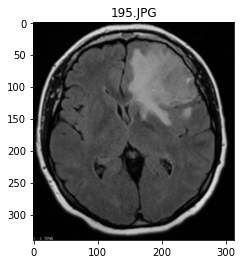

2.jpg
******************************
class = 0


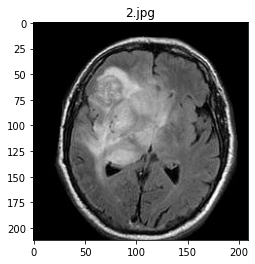

In [8]:
# Images belong to class 0 (brain tumor = yes)

plt.figure(figsize=(4,4))
for i in range(160,162):
    fig, ax = plt.subplots(figsize=(4,4))
    img = mpimg.imread(df['filepaths'][i])
    img_name = re.sub(r'^\D+','',df['filepaths'][i])
    ax.imshow(img)
    print(img_name)
    ax.set_title(img_name)
    print('*'*30)
    print('class =', df['labels'][i])
    plt.show()

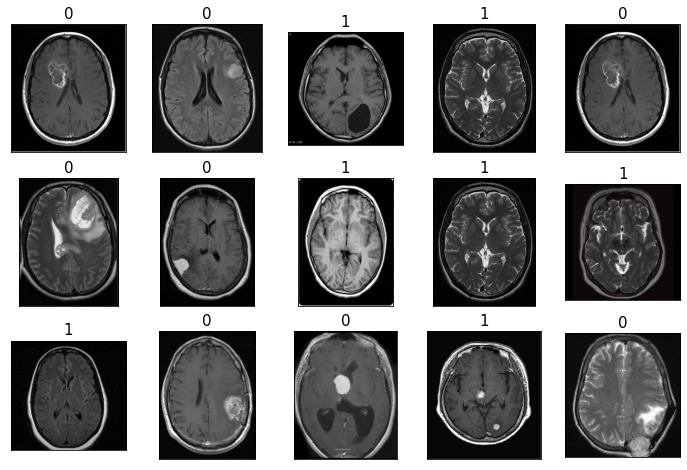

In [9]:
#visualize brain tumor images
import cv2
plt.figure(figsize=(12,8))
for i in range(15):
    random = np.random.randint(1,len(df))
    plt.subplot(3,5,i+1)
    plt.imshow(cv2.imread(df.loc[random,"filepaths"]))
    plt.title(df.loc[random, "labels"], size = 15) 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

Since each image has different size, we need to resize them into same size

In [10]:
from PIL import Image
widths = []
heights = []
for idx, row in df.iterrows():
    path = row['filepaths']
    im = Image.open(path)
    width, height = im.size
    widths.append(width)
    heights.append(height)
avg_width = int(sum(widths) / len(widths))
avg_height = int(sum(heights) / len(heights))
print(avg_width, avg_height)

354 386


The average width is 354 and the average height is 386.
Making the width and height equal makes it simpler to do transformations later. So we’ll resize images to 300x300.

In [11]:
from keras.preprocessing.image import load_img

# Image Resize Function
def load_resize_image(path):
    image = load_img(path,target_size=(300,300))
    return image

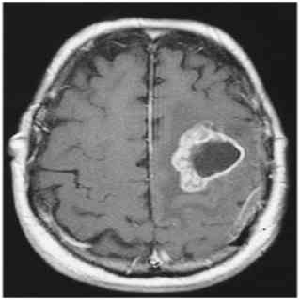

In [12]:
load_img('yes/Y10.jpg',target_size=(300,300))

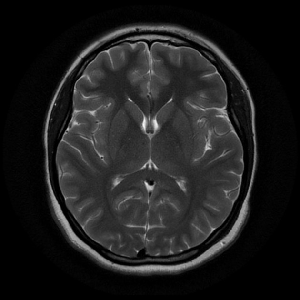

In [13]:
load_img('no/1 no.jpeg',target_size=(300,300))

In [14]:
images =[]
labels =[]
from keras.preprocessing.image import img_to_array
for idx, row in df.iterrows():
    path = row['filepaths']
    label = row['labels']
    image = load_resize_image(path)
    # turn image to array
    image_array = img_to_array(image)   
    images.append(image_array)
    labels.append(label)

In [15]:
print(images[0:2])

[array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32), array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [

In [16]:
print(labels[0:2])

[1, 1]


# 4. Shuffling the data

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
from sklearn.utils import shuffle
image_list, cancer_list = shuffle(images, labels)

In [19]:
X_data = np.array(images)
y_data = np.array(labels)

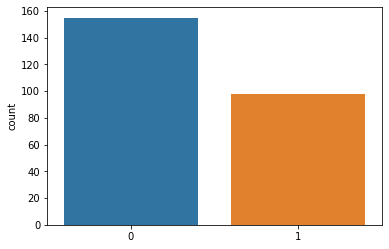

In [20]:
import seaborn as sns
sns.countplot(y_data)
plt.show()

In [21]:
print(X_data.shape)
print(y_data.shape)

(253, 300, 300, 3)
(253,)


# 5. Splitting the data into training and testing dataset

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=0)

In [23]:
print(X_train.shape)
print(y_train.shape)

(202, 300, 300, 3)
(202,)


In [24]:
X_train = X_train/255
X_test = X_test/255

In [25]:
print(X_test.shape)
print(y_test.shape)

(51, 300, 300, 3)
(51,)


# 6. Model Building

## Convolutional Neural Networks

### Model 1 - CNN: 3 Layers

In [26]:
epochs = 20
batch_size = 10
input_shape = (300,300,3)

In [27]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0

In [29]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [30]:
#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch

hist = model.fit(X_train, y_train,
                 batch_size=batch_size,epochs=epochs,
                 verbose=1,validation_data=(X_test, y_test))

Epoch 1/20
21/21 [==============================] - 39s 2s/step - loss: 0.6749 - acc: 0.5396 - val_loss: 0.6031 - val_acc: 0.7059
Epoch 2/20
21/21 [==============================] - 39s 2s/step - loss: 0.6702 - acc: 0.5792 - val_loss: 0.6245 - val_acc: 0.7059
Epoch 3/20
21/21 [==============================] - 39s 2s/step - loss: 0.6716 - acc: 0.5842 - val_loss: 0.6026 - val_acc: 0.7059
Epoch 4/20
21/21 [==============================] - 39s 2s/step - loss: 0.6872 - acc: 0.5594 - val_loss: 0.6527 - val_acc: 0.7059
Epoch 5/20
21/21 [==============================] - 40s 2s/step - loss: 0.6528 - acc: 0.5941 - val_loss: 0.5872 - val_acc: 0.7059
Epoch 6/20
21/21 [==============================] - 43s 2s/step - loss: 0.6505 - acc: 0.6040 - val_loss: 0.5960 - val_acc: 0.7059
Epoch 7/20
21/21 [==============================] - 38s 2s/step - loss: 0.6600 - acc: 0.5990 - val_loss: 0.6250 - val_acc: 0.7451
Epoch 8/20
21/21 [==============================] - 40s 2s/step - loss: 0.6252 - acc: 0.65

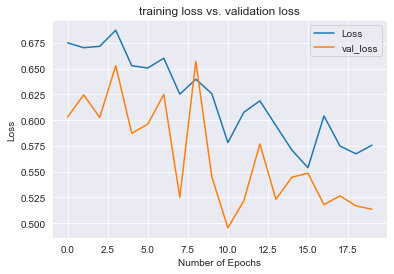

In [31]:
import seaborn as sns
sns.set_style('darkgrid')
plt.plot(hist.history['loss'], label="Loss")
plt.plot(hist.history["val_loss"], label = "val_loss")
plt.title("training loss vs. validation loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

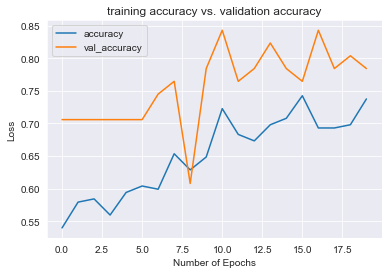

In [33]:
plt.plot(hist.history['acc'], label="accuracy")
plt.plot(hist.history["val_acc"], label = "val_accuracy")
plt.title("training accuracy vs. validation accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Model 2 - CNN: 5 Layers

In [34]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 33, 33, 64)       

In [36]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [37]:
hist = model.fit(X_train, y_train,
                 batch_size=batch_size,epochs=epochs,
                 verbose=1,validation_data=(X_test, y_test))

Epoch 1/20
21/21 [==============================] - 39s 2s/step - loss: 0.6792 - acc: 0.5743 - val_loss: 0.6158 - val_acc: 0.7059
Epoch 2/20
21/21 [==============================] - 37s 2s/step - loss: 0.6608 - acc: 0.5941 - val_loss: 0.6046 - val_acc: 0.7059
Epoch 3/20
21/21 [==============================] - 39s 2s/step - loss: 0.6584 - acc: 0.5842 - val_loss: 0.6161 - val_acc: 0.8039
Epoch 4/20
21/21 [==============================] - 36s 2s/step - loss: 0.6163 - acc: 0.6782 - val_loss: 0.5709 - val_acc: 0.7255
Epoch 5/20
21/21 [==============================] - 32s 2s/step - loss: 0.6796 - acc: 0.6238 - val_loss: 0.6014 - val_acc: 0.7059
Epoch 6/20
21/21 [==============================] - 31s 1s/step - loss: 0.6392 - acc: 0.6139 - val_loss: 0.5679 - val_acc: 0.7059
Epoch 7/20
21/21 [==============================] - 30s 1s/step - loss: 0.6129 - acc: 0.6436 - val_loss: 0.5668 - val_acc: 0.7451
Epoch 8/20
21/21 [==============================] - 31s 1s/step - loss: 0.6343 - acc: 0.61

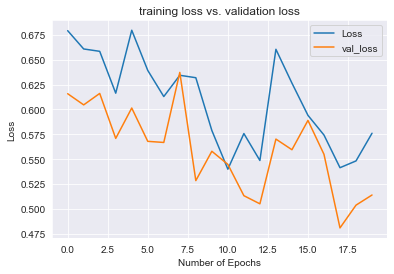

In [39]:
plt.plot(hist.history['loss'], label="Loss")
plt.plot(hist.history["val_loss"], label = "val_loss")
plt.title("training loss vs. validation loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

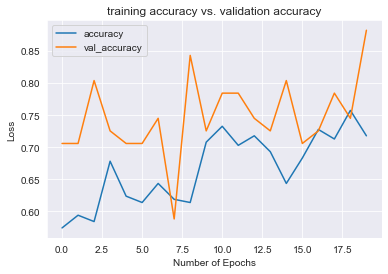

In [40]:
plt.plot(hist.history['acc'], label="accuracy")
plt.plot(hist.history["val_acc"], label = "val_accuracy")
plt.title("training accuracy vs. validation accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Transfer Learning

### Model 3 - Resnet 50

In [27]:
from tensorflow.keras.applications.resnet50 import ResNet50 
from tensorflow.keras import Model, layers
from tensorflow.keras.optimizers import SGD

conv_base = ResNet50(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False
    
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(1, activation='sigmoid')(x)
model = Model(conv_base.input, predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [29]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
hist = model.fit(X_train,y_train,
                 batch_size=10,
                 epochs=20,
                 validation_data=(X_test, y_test))

Epoch 1/20
21/21 [==============================] - 59s 2s/step - loss: 0.7722 - accuracy: 0.5792 - val_loss: 0.7701 - val_accuracy: 0.2941
Epoch 2/20
21/21 [==============================] - 50s 2s/step - loss: 0.6441 - accuracy: 0.6733 - val_loss: 0.5042 - val_accuracy: 0.7451
Epoch 3/20
21/21 [==============================] - 51s 2s/step - loss: 0.6119 - accuracy: 0.6584 - val_loss: 0.5766 - val_accuracy: 0.7255
Epoch 4/20
21/21 [==============================] - 49s 2s/step - loss: 0.5688 - accuracy: 0.7079 - val_loss: 0.5136 - val_accuracy: 0.8039
Epoch 5/20
21/21 [==============================] - 51s 2s/step - loss: 0.5662 - accuracy: 0.7277 - val_loss: 0.5824 - val_accuracy: 0.6471
Epoch 6/20
21/21 [==============================] - 51s 2s/step - loss: 0.5737 - accuracy: 0.6980 - val_loss: 0.6228 - val_accuracy: 0.6275
Epoch 7/20
21/21 [==============================] - 51s 2s/step - loss: 0.5668 - accuracy: 0.7277 - val_loss: 0.4020 - val_accuracy: 0.8627
Epoch 8/20
21/21 [==

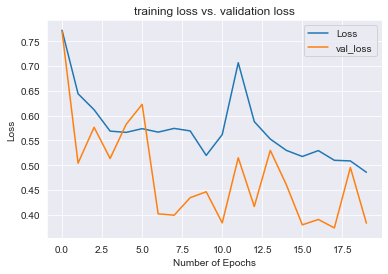

In [33]:
plt.plot(hist.history['loss'], label="Loss")
plt.plot(hist.history["val_loss"], label = "val_loss")
plt.title("training loss vs. validation loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

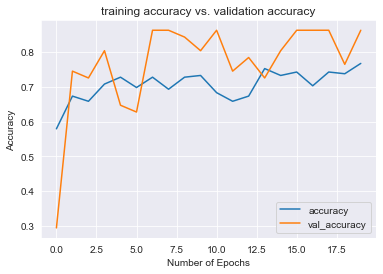

In [35]:
plt.plot(hist.history['accuracy'], label="accuracy")
plt.plot(hist.history["val_accuracy"], label = "val_accuracy")
plt.title("training accuracy vs. validation accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Model 4 - VGG16

In [35]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras import Model, layers
from tensorflow.keras.optimizers import SGD

vgg = vgg16.VGG16(include_top=True, weights=None, input_tensor=None,
                    input_shape=(300,300,3),
                    pooling="max", classes=2)
 
x = vgg.output
x = keras.layers.Dense(128, activation='relu')(x) 
predictions = keras.layers.Dense(1, activation='sigmoid')(x)
model = Model(vgg.input, predictions)
model.compile(optimizer=SGD(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [37]:
hist = model.fit(x=X_train, y=y_train, batch_size=10,
                        epochs=20, verbose=1,
                        validation_data=(X_test, y_test)) 

Epoch 1/20
21/21 [==============================] - 365s 17s/step - loss: 0.7001 - accuracy: 0.4109 - val_loss: 0.7083 - val_accuracy: 0.2941
Epoch 2/20
21/21 [==============================] - 375s 18s/step - loss: 0.7000 - accuracy: 0.4109 - val_loss: 0.7082 - val_accuracy: 0.2941
Epoch 3/20
21/21 [==============================] - 374s 18s/step - loss: 0.7000 - accuracy: 0.4109 - val_loss: 0.7081 - val_accuracy: 0.2941
Epoch 4/20
21/21 [==============================] - 373s 18s/step - loss: 0.6999 - accuracy: 0.4109 - val_loss: 0.7079 - val_accuracy: 0.2941
Epoch 5/20
21/21 [==============================] - 373s 18s/step - loss: 0.6998 - accuracy: 0.4109 - val_loss: 0.7077 - val_accuracy: 0.2941
Epoch 6/20
21/21 [==============================] - 373s 18s/step - loss: 0.6998 - accuracy: 0.4109 - val_loss: 0.7076 - val_accuracy: 0.2941
Epoch 7/20
21/21 [==============================] - 375s 18s/step - loss: 0.6997 - accuracy: 0.4109 - val_loss: 0.7074 - val_accuracy: 0.2941
Epoch 

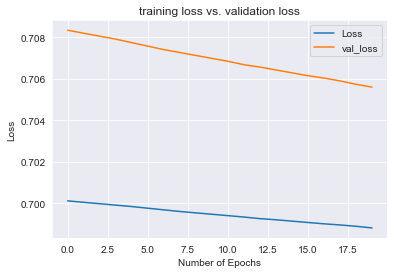

In [38]:
plt.plot(hist.history['loss'], label="Loss")
plt.plot(hist.history["val_loss"], label = "val_loss")
plt.title("training loss vs. validation loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

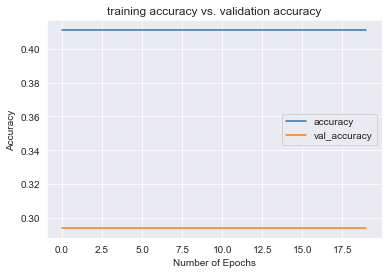

In [39]:
plt.plot(hist.history['accuracy'], label="accuracy")
plt.plot(hist.history["val_accuracy"], label = "val_accuracy")
plt.title("training accuracy vs. validation accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()